In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import log_loss
%matplotlib inline
print("Seaborn version: ", sns.__version__)

Seaborn version:  0.9.0


In [2]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [13]:
game_data = pd.read_csv('D1_2015_Training_Data.csv')
print("Number of records= ", game_data.shape[0])
game_data.head()


Number of records=  5515


,scheduled_date,game_id,home_team,market,opp_market,points_game,game_result,opp_points_game,prn_enter_pts_avg,prn_enter_allow_pts_avg,...,opp_enter_allow_fg_pct,opp_enter_off_rebs_avg,opp_enter_allow_off_rebs_avg,opp_enter_def_rebs_avg,opp_enter_ft_att_avg,opp_enter_allow_ft_att_avg,opp_enter_ft_pct,opp_enter_turnover_avg,opp_enter_take_away_avg,opp_enter_win_pct
0,2015-11-13 00:00:00.0000000,e08607b9-ff8f-4bfd-b62d-e49a2c31bb35,True,Eastern Michigan,Vermont,70,True,50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-11-13 00:00:00.0000000,e302d3cb-bbeb-47fa-9f96-0d85eb176c86,False,Fairfield,Yale,57,False,70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-11-13 00:00:00.0000000,6927bc52-8608-42ab-9d1c-504c48211edd,True,Iowa State,Colorado,68,True,62,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-11-13 00:00:00.0000000,2ab37176-3e33-483a-b3d6-5e2f28361dc2,False,Jacksonville State,Central Michigan,83,False,89,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-11-13 00:00:00.0000000,af588f0f-e314-4f49-b429-dd50d65de7fb,True,Ole Miss,Northwestern State,90,True,76,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
game_data = game_data[game_data['scheduled_date'] > '2015-12-15'].copy()

encode_game_result = {"game_result": {False: "LOSS", True: "WIN"}}
game_data.replace(encode_game_result, inplace=True)
game_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4061 entries, 1454 to 5514
Data columns (total 36 columns):
scheduled_date                  4061 non-null object
game_id                         4061 non-null object
home_team                       4061 non-null bool
market                          4061 non-null object
opp_market                      4061 non-null object
points_game                     4061 non-null int64
game_result                     4061 non-null object
opp_points_game                 4061 non-null int64
prn_enter_pts_avg               4061 non-null float64
prn_enter_allow_pts_avg         4061 non-null float64
prn_enter_possesion_avg         4061 non-null float64
prn_enter_fg_pct                4061 non-null float64
prn_enter_allow_fg_pct          4061 non-null float64
prn_enter_off_rebs_avg          4061 non-null float64
prn_enter_allow_off_rebs_avg    4061 non-null float64
prn_enter_def_rebs_avg          4061 non-null float64
prn_enter_ft_att_avg            4061 n

In [16]:
numeric_feature_to_scale = ['prn_enter_pts_avg', 'prn_enter_allow_pts_avg', 
                            'prn_enter_possesion_avg',
                            'prn_enter_off_rebs_avg', 'prn_enter_allow_off_rebs_avg',
                            'prn_enter_def_rebs_avg',
                            'prn_enter_ft_att_avg', 'prn_enter_allow_ft_att_avg',
                            'prn_enter_turnover_avg', 'prn_enter_take_away_avg',
                            'opp_enter_pts_avg', 'opp_enter_allow_pts_avg',
                            'opp_enter_possesion_avg',
                            'opp_enter_off_rebs_avg', 'opp_enter_allow_off_rebs_avg',
                            'opp_enter_def_rebs_avg',
                            'opp_enter_ft_att_avg', 'opp_enter_allow_ft_att_avg',
                            'opp_enter_turnover_avg','opp_enter_take_away_avg']

game_data_scale = game_data[numeric_feature_to_scale].copy()
scaler =StandardScaler()
scaled_features = scaler.fit_transform(game_data_scale.values)
scaled_df = pd.DataFrame(scaled_features, index=game_data_scale.index, columns=game_data_scale.columns)

# Add the categorical columns and previously scaled numerics 
scaled_df['home_team'] = game_data['home_team']
scaled_df['prn_enter_fg_pct'] = game_data['prn_enter_fg_pct']
scaled_df['prn_enter_ft_pct'] = game_data['prn_enter_ft_pct']
scaled_df['prn_enter_win_pct'] = game_data['prn_enter_win_pct']
scaled_df['prn_enter_allow_fg_pct'] = game_data['prn_enter_allow_fg_pct']
scaled_df['opp_enter_fg_pct'] = game_data['opp_enter_fg_pct']
scaled_df['opp_enter_ft_pct'] = game_data['opp_enter_ft_pct']
scaled_df['opp_enter_win_pct'] = game_data['opp_enter_win_pct']
scaled_df['opp_enter_allow_fg_pct'] = game_data['opp_enter_allow_fg_pct']


scaled_df.head()


,prn_enter_pts_avg,prn_enter_allow_pts_avg,prn_enter_possesion_avg,prn_enter_off_rebs_avg,prn_enter_allow_off_rebs_avg,prn_enter_def_rebs_avg,prn_enter_ft_att_avg,prn_enter_allow_ft_att_avg,prn_enter_turnover_avg,prn_enter_take_away_avg,...,opp_enter_take_away_avg,home_team,prn_enter_fg_pct,prn_enter_ft_pct,prn_enter_win_pct,prn_enter_allow_fg_pct,opp_enter_fg_pct,opp_enter_ft_pct,opp_enter_win_pct,opp_enter_allow_fg_pct
1454,0.565391,-0.075207,-0.166937,-0.335969,0.585072,0.505045,-0.461244,0.368153,-0.378663,-1.187251,...,-0.959900,False,0.450142,0.689076,0.50,0.435897,0.532508,0.680000,0.83,0.415625
1455,-0.904430,-0.213256,-0.149767,0.141305,0.337915,0.505045,-0.139921,0.977445,0.498917,-1.494496,...,-0.959900,False,0.416422,0.656000,0.33,0.398844,0.407104,0.744361,0.29,0.480663
1456,-0.716961,-0.640706,0.023158,1.003846,0.689927,-0.071921,-0.268451,0.520476,0.657277,1.123230,...,1.482832,False,0.417910,0.706294,0.43,0.440860,0.424419,0.666667,0.50,0.429054
1457,-0.083662,1.097370,-1.321609,-1.509026,-1.287334,-2.537984,-1.852572,0.179272,-1.203457,-0.369980,...,1.383248,False,0.451754,0.685484,0.38,0.526559,0.366906,0.733333,0.14,0.475949
1458,-0.110443,0.237480,-0.219673,-0.473975,1.760944,0.458515,0.007887,-0.481810,1.409489,-1.334729,...,-1.985028,False,0.470130,0.610738,0.29,0.417978,0.469136,0.772358,0.50,0.468045


In [17]:
X = scaled_df
y= game_data['game_result'].copy()
y = pd.get_dummies(y, columns=['game_result'], drop_first=True)
y=y.WIN
X = pd.get_dummies(X, columns=['home_team'], drop_first=True)
print(X.shape)
X.head()

(4061, 29)


,prn_enter_pts_avg,prn_enter_allow_pts_avg,prn_enter_possesion_avg,prn_enter_off_rebs_avg,prn_enter_allow_off_rebs_avg,prn_enter_def_rebs_avg,prn_enter_ft_att_avg,prn_enter_allow_ft_att_avg,prn_enter_turnover_avg,prn_enter_take_away_avg,...,opp_enter_take_away_avg,prn_enter_fg_pct,prn_enter_ft_pct,prn_enter_win_pct,prn_enter_allow_fg_pct,opp_enter_fg_pct,opp_enter_ft_pct,opp_enter_win_pct,opp_enter_allow_fg_pct,home_team_True
1454,0.565391,-0.075207,-0.166937,-0.335969,0.585072,0.505045,-0.461244,0.368153,-0.378663,-1.187251,...,-0.959900,0.450142,0.689076,0.50,0.435897,0.532508,0.680000,0.83,0.415625,0
1455,-0.904430,-0.213256,-0.149767,0.141305,0.337915,0.505045,-0.139921,0.977445,0.498917,-1.494496,...,-0.959900,0.416422,0.656000,0.33,0.398844,0.407104,0.744361,0.29,0.480663,0
1456,-0.716961,-0.640706,0.023158,1.003846,0.689927,-0.071921,-0.268451,0.520476,0.657277,1.123230,...,1.482832,0.417910,0.706294,0.43,0.440860,0.424419,0.666667,0.50,0.429054,0
1457,-0.083662,1.097370,-1.321609,-1.509026,-1.287334,-2.537984,-1.852572,0.179272,-1.203457,-0.369980,...,1.383248,0.451754,0.685484,0.38,0.526559,0.366906,0.733333,0.14,0.475949,0
1458,-0.110443,0.237480,-0.219673,-0.473975,1.760944,0.458515,0.007887,-0.481810,1.409489,-1.334729,...,-1.985028,0.470130,0.610738,0.29,0.417978,0.469136,0.772358,0.50,0.468045,0


In [18]:
print(y.shape)

(4061,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.head()

(3248, 29)
(3248,)
(813, 29)
(813,)


,prn_enter_pts_avg,prn_enter_allow_pts_avg,prn_enter_possesion_avg,prn_enter_off_rebs_avg,prn_enter_allow_off_rebs_avg,prn_enter_def_rebs_avg,prn_enter_ft_att_avg,prn_enter_allow_ft_att_avg,prn_enter_turnover_avg,prn_enter_take_away_avg,...,opp_enter_take_away_avg,prn_enter_fg_pct,prn_enter_ft_pct,prn_enter_win_pct,prn_enter_allow_fg_pct,opp_enter_fg_pct,opp_enter_ft_pct,opp_enter_win_pct,opp_enter_allow_fg_pct,home_team_True
2253,-1.892186,0.718154,-0.335201,-1.008751,0.360384,-1.388705,-0.663678,0.002578,2.788544,0.428857,...,0.551430,0.395872,0.630208,0.30,0.482578,0.387597,0.591440,0.17,0.469154,0
2062,1.089989,2.354772,1.695992,0.302312,-0.665695,-0.169633,-0.586560,2.281331,0.281172,-0.025866,...,-0.215951,0.434932,0.668571,0.44,0.490530,0.414669,0.644444,0.27,0.475842,1
2042,-0.327844,-0.296417,-0.149767,0.814087,0.023350,0.774916,0.531643,-1.103288,0.776048,-1.445337,...,1.260233,0.425787,0.687273,0.58,0.420979,0.431416,0.645914,0.50,0.419811,1
2854,-0.609835,1.872436,-0.809486,-1.739037,0.120716,-1.379399,-0.454818,-0.134513,0.129410,-0.935311,...,0.445989,0.428969,0.736434,0.15,0.509044,0.405063,0.704871,0.60,0.426752,0
5510,2.288845,1.077411,1.431879,0.566825,0.742355,1.179722,1.598435,-0.116234,-0.827351,-0.388415,...,-1.147352,0.459270,0.771300,0.68,0.433636,0.442547,0.682422,0.65,0.396525,1


In [20]:
logreg = LogisticRegression()

result = logreg.fit(X_train,y_train)

print("Coeffs ",logreg.coef_)
print("Intercept ", logreg.intercept_)

Coeffs  [[ 5.93290033e-01 -6.35283863e-01  1.36635686e-01  3.10188086e-02
  -3.56526344e-02 -4.81249740e-02 -4.59638502e-02 -1.00234544e-01
  -1.44737917e-01  2.99519596e-04 -8.00381622e-01  6.71607177e-01
   1.00888238e-01 -1.61421229e-01  1.23625857e-01  1.52392526e-01
   5.63736781e-02 -1.45357150e-02 -1.93880921e-02  5.93865274e-02
  -3.60539749e-01  1.96772006e-01  9.95069445e-02 -4.10912112e-01
  -4.77426386e-01  1.08880021e-01 -1.17511639e-01  1.44805786e-01
   1.13272450e+00]]
Intercept  [-0.29215059]


In [21]:
y_pred = logreg.predict(X_test)
print("LR model accuracy is %2.2f" % metrics.accuracy_score(y_test, y_pred))

LR model accuracy is 0.73


In [22]:
prediction_probabilities = logreg.predict_proba(X_test)
prediction_probabilities[:,1]
pred_probs = pd.Series(prediction_probabilities[:,1], index=X_test.index)
predictions = pd.Series(y_pred, index=y_test.index)
print(y_pred.shape)

(813,)


In [23]:
# Retrieve the non-normalized game stats
test_games = game_data[game_data.index.isin(X_test.index)].copy()
test_games.shape

test_games['predicted_result'] = predictions
test_games['pred_win_prob'] = pred_probs

encode_pred_result = {"predicted_result": {0: "LOSS", 1: "WIN"}}
test_games.replace(encode_pred_result, inplace=True)

test_games.head()

,scheduled_date,game_id,home_team,market,opp_market,points_game,game_result,opp_points_game,prn_enter_pts_avg,prn_enter_allow_pts_avg,...,opp_enter_allow_off_rebs_avg,opp_enter_def_rebs_avg,opp_enter_ft_att_avg,opp_enter_allow_ft_att_avg,opp_enter_ft_pct,opp_enter_turnover_avg,opp_enter_take_away_avg,opp_enter_win_pct,predicted_result,pred_win_prob
1455,2015-12-15 00:00:00.0000000,85f37e83-6b6f-4512-b97a-ea06dca185cd,False,Coastal Carolina,Wofford,71,WIN,63,66.67,71.00,...,7.14,20.71,19.00,22.43,0.744361,10.86,11.00,0.29,LOSS,0.362651
1463,2015-12-15 00:00:00.0000000,a2064df4-beee-4969-94d5-9b2c08160342,False,Prairie View A&M,Tulane,49,LOSS,63,57.25,79.75,...,9.56,24.89,21.89,18.67,0.654822,14.56,13.78,0.56,LOSS,0.028536
1470,2015-12-16 00:00:00.0000000,23ac6027-7c73-4acf-820c-b0d170ccf342,False,DePaul,Stanford,60,LOSS,79,70.78,70.22,...,9.86,22.43,29.57,18.14,0.632850,13.86,10.86,0.57,LOSS,0.224242
1471,2015-12-16 00:00:00.0000000,3e705f68-d06a-4c1b-8b0f-06e87be50430,False,Drexel,South Carolina,54,LOSS,79,68.67,73.17,...,8.63,26.13,28.88,20.63,0.688312,12.25,16.13,1.00,LOSS,0.047769
1479,2015-12-16 00:00:00.0000000,6966e23e-f98e-48b1-a24e-70c7245dd67e,False,Jackson State,Miami (OH),53,LOSS,64,69.88,74.75,...,9.25,19.25,20.50,19.75,0.756098,12.00,15.88,0.50,LOSS,0.315682


Text(0.5,1,'Probabilities For Missed Predictions')

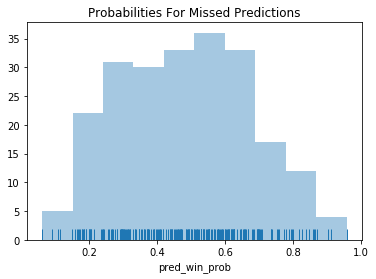

In [24]:
missed_predictions = test_games[test_games['game_result'] != 
                                test_games['predicted_result']].sort_values(by='pred_win_prob', ascending=False)

missed_predictions.pred_win_prob

sns.distplot(missed_predictions.pred_win_prob, kde=False, rug=True).set_title("Probabilities For Missed Predictions")

Text(0.5,1,'Probabilities For Correct Predictions')

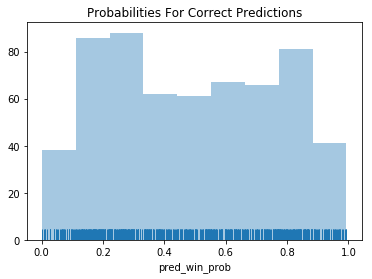

In [25]:
correct_predictions = test_games[test_games['game_result'] == 
                                test_games['predicted_result']].sort_values(by='pred_win_prob', ascending=False)

sns.distplot(correct_predictions.pred_win_prob, kde=False, rug=True).set_title("Probabilities For Correct Predictions")

In [66]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7175572519083969
Precision: 0.7358490566037735
Recall: 0.6876574307304786


In [28]:
log_loss(y_test, prediction_probabilities)

0.5447381934366399